https://zhuanlan.zhihu.com/p/35280832  
## **步骤1：数据集准备**

准备数据集是一件很枯燥的事情，即使有大量的数据，有时也很难找到一个适用于待解决问题的数据集。本文中，我们直接使用UCI机器学习库中的[“Pima Indians Diabetes Database”](https://www.kaggle.com/uciml/pima-indians-diabetes-database)，我们将用机器学习算法来处理它。

## **步骤2：数据分析**

导入数据后，首先我们应该对数据集进行分析，从而更好的理解数据和数据集的特征，以便确定是否进行数据清理。

首先，导入必要的计算库。

In [57]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
diabetes = pd.read_csv('data/diabetes.csv')
diabetes.columns 
# 忽略警告
import warnings
warnings.filterwarnings("ignore")

In [2]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print("Diabetes data set dimensions : {}".format(diabetes.shape))

Diabetes data set dimensions : (768, 9)


数据集的维度显示为（768，9）。“Outcome”列标识病人是否患有糖尿病，1代表患病，0代表健康。我们可以计算出768人中，500个标识为0（未患病），268个标识为1（患病）。

In [6]:
diabetes.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

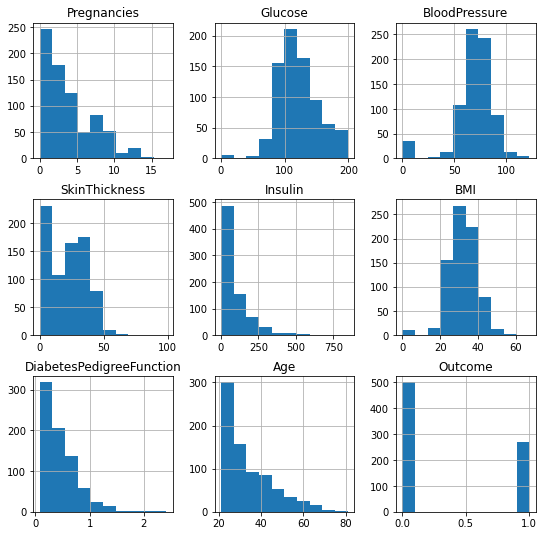

In [62]:
# 这一句学到了，这样就可以直接看每一列的分布情况了
diabetes.hist(figsize=(9, 9))

## **步骤 3：数据清理**

数据清理过程中，需要考虑一下几个方面。

（1）重复或无关的数据

（2）错误标识的数据，或者多次出现相同的标识

（3）缺失或空的数据点

（4）异常值

因为我们使用的是标准数据库，所以可以假定第（1）、（2）条已经被处理过了。所以我们重点考察缺失的数据点和异常值。

**缺失或空数据点**

可以采用如下的函数来搜寻缺失或空缺的数据点。

In [9]:
diabetes.isnull().sum()
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

结果并未发现空缺数据点，如果存在的化，我们就需要对其进行相应的处理。

**异常值**

分析直方图时，我们发现某些列存在一些异常值，所以需要进行深入分析并确定如何处理它们。

血压（Blood pressure）:通过分析数据，我们发现有些血压值为0。很明显，一个正常人的血压不可能为0，所以这些数据是错误的。

In [12]:
print("Total : ", diabetes[diabetes.BloodPressure == 0].shape[0])
print(diabetes[diabetes.BloodPressure == 0].groupby('Outcome')['Age'].count())

Total :  35
Outcome
0    19
1    16
Name: Age, dtype: int64


对于以上的异常数据，可以采用以下几种方法进行处理：

移除异常值：通常该方法难以实现，因为移除数据意味着会丢失有价值的数据。本例中，皮褶厚度和胰岛素两列出现了大量的异常值，若移除它们，则会丢失其他列的有效数据。
采用平均值： 该方法对于某些数据集是适用的，但对于本例来说，对血压项设置为平均值会给模型引入较大的误差。
弃用特征： 对于出现大量异常值的特征，有时可考虑弃用该特征（如皮褶厚度），但通过较难判断是否会影响模型的准确性。
通过分析数据，我们可以得知采用的数据集并不完整。经过综合分析，因为本例仅是为了验证算法的可行性，所以我们决定移除血压、BMI和血糖各特征中为0值的行。

In [15]:
diabetes_mod = diabetes[(diabetes.BloodPressure != 0) & (diabetes.BMI != 0) & (diabetes.Glucose != 0)]
print(diabetes_mod.shape)

(724, 9)


## 步骤4：特征工程  
特征过程是指将数据转换成特征，从而更好的去建模、优化和提高准确率的过程。
对于本文的算例，我们采用的是成熟的数据集，无法进一步的创建或消除任何数据点了，所以我们选择以下特征创建模型。

In [17]:
diabetes_mod

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [69]:
X = diabetes_mod.iloc[:,:-1]
y = diabetes_mod.Outcome

## **步骤 5：模型选择**

模型选择或算法选择是机器学习中最有趣和最核心的部分。在该环节，我们会选择出对数据集表现最好的模型（算法）来进行预测。

我们会计算不同分类模型（在默认参数下）的分类准确率（或测试准确率），从而确定对数据集拟合最优的模型。首先，我们导入 7 种不同的分类器，分别为：**K-Nearest Neighbors, Support Vector Classifier, Logistic Regression, Gaussian Naive Bayes, Random Forest and Gradient Boost。**

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [22]:
# 然后，将各个分类器按默认参数初始化，并建立一个模型列表。
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

### 计算方法

为了避免过拟合的发生，我们通常开展以下两方面的工作。

训练/测试数据划分
K折叠交叉验证（K-Fold Cross Validation）
这里，我们将用“train_test_split”函数进行数据划分，“cross_val_score”函数进行K折叠交叉验证。通过这两个步骤，我们可以确定适用于数据集的最优分类器模型。

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

### 训练/测试数据划分

通过划分，我们将数据集分为两个部分，训练数据集（Training set）和测试数据集（Testing set）。训练数据集用来训练模型，测试数据集用来评估模型的准确率。

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = diabetes_mod.Outcome, random_state=0)

In [31]:
# 然后我们用“accuracy_score”来计算各个模型的准确率。
names = []
scores = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.729282
1  SVC  0.740331
2   LR  0.762431
3   DT  0.751381
4  GNB  0.734807
5   RF  0.779006
6   GB  0.773481


### K折叠交叉验证

对于个分类或回归问题，假设有多个可选的模型为。K-折叠交叉验证就是将训练集的1/k作为测试集，每个模型训练k次，测试k次，错误率为k次的平均，最终选择平均率最小的模型Mi。

KFold(n_splits=’warn’, shuffle=False, random_state=None)
参数:
n_splits 表示划分为几块（至少是2）

shuffle 表示是否打乱划分，默认False，即不打乱

random_state 表示是否固定随机起点，Used when shuffle == True.

In [32]:
from sklearn.model_selection import KFold
names = []
scores = []
for name, model in models:
    
    kfold = KFold(n_splits=10, shuffle=True,random_state=10) 
    score = cross_val_score(model, X, y, cv=kfold, scoring='accuracy').mean()
    
    names.append(name)
    scores.append(score)
kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

  Name     Score
0  KNN  0.707116
1  SVC  0.752778
2   LR  0.765240
3   DT  0.685008
4  GNB  0.752683
5   RF  0.762405
6   GB  0.752721


In [71]:
axis.patches 

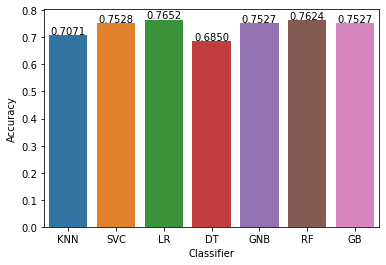

In [72]:
axis = sns.barplot(data = kf_cross_val,x = 'Name', y = 'Score' )
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches: # 大概是返回每个柱子对象
    height = p.get_height() # 获取高度
    x = p.get_x() + p.get_width()/2 # 确定x坐标
    axis.text(x, height + 0.005, '{:1.4f}'.format(height), ha="center") 
plt.show()

可以看到，二元回归算法（Logistic Regression）的准确率最高（77.64%），因此我们选择二元回归作为数据集的模型。

## **步骤 6：模型参数调整**

采用默认参数，二元回归模型获得了较好的预测准确率。接下来，我们将对模型的参数进行调整，优化模型，从而获得更准确的模型。本例采用的是 GridSearchCV 方法，该方法通过交叉验证对参数空间进行求解，寻找最佳的参数。 

首先，导入 GridSearchCV 方法。

In [41]:
from sklearn.model_selection import GridSearchCV

然后，给出二元回归模型的参数列表。

In [38]:
# Specify parameters
c_values = list(np.arange(1, 10))
param_grid = [
    {'C': c_values, 'penalty': ['l1'], 'solver' : ['liblinear'], 'multi_class' : ['ovr']},
   {'C': c_values, 'penalty': ['l2'], 'solver' : ['liblinear', 'newton-cg', 'lbfgs'], 'multi_class' : ['ovr']}
]

将数据输入GridSearchCV，通过交叉验证来确认不同参数的组合效果。

In [55]:
strat_k_fold=KFold(n_splits=10, shuffle=True,random_state=10) 

In [53]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=strat_k_fold, scoring='accuracy')
grid.fit(X, y)

GridSearchCV(cv=KFold(n_splits=10, random_state=10, shuffle=True),
             estimator=LogisticRegression(),
             param_grid=[{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'multi_class': ['ovr'], 'penalty': ['l1'],
                          'solver': ['liblinear']},
                         {'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'multi_class': ['ovr'], 'penalty': ['l2'],
                          'solver': ['liblinear', 'newton-cg', 'lbfgs']}],
             scoring='accuracy')

In [54]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 3, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}
LogisticRegression(C=3, multi_class='ovr', penalty='l1', solver='liblinear')


经过分析，我们确定最优的超参数如下：
{'C': 2, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'liblinear'}
LogisticRegression(C=2, multi_class='ovr', solver='liblinear')

将优化后的参数输入回二元回归模型，可以看到模型预测的准确度得到了提升。

In [66]:
logreg_new = LogisticRegression(C=3, multi_class='ovr', penalty='l2', solver='liblinear')
initial_score = cross_val_score(logreg_new, X, y, cv=strat_k_fold, scoring='accuracy').mean()
print("Final accuracy : {} ".format(initial_score))


Final accuracy : 0.7707191780821917 
